Describe your non-parametric model (empirical cumulative distribution functions, kernel density function, local constant least squares regression, Markov transition models). How are you fitting your model to the phenomenon to get realistic properties of the data? What challenges did you have to overcome? (15/100 pts

In [1]:
#import packages
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pyxlsb


In [2]:
#load data

In [3]:
data = pd.read_excel('emissions_by_unit_and_fuel_type_c_d_aa.xlsb', skiprows = 6)
data

,Facility Id,FRS Id,Facility Name,City,State,Primary NAICS Code,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Name,Unit Type,Unit Reporting Method,Unit Maximum Rated Heat Input Capacity (mmBTU/hr),Unit CO2 emissions (non-biogenic),Unit Methane (CH4) emissions,Unit Nitrous Oxide (N2O) emissions,Unit Biogenic CO2 emissions (metric tons)
0,1001155,1.100004e+11,1500 South Tibbs LLC d/b/a Aurorium Indianapol...,Indianapolis,IN,325199.0,2023,C,Chemicals,GP-1,NaN,Tier1/2/3,91.8,64740.5,30.50,36.356,0.0
1,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.00,OCS (Other combustion source),Tier1/2/3,30.0,3304.7,1.50,1.788,0.0
2,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.01,OCS (Other combustion source),Tier1/2/3,30.0,0.2,0.00,0.000,0.0
3,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.02,OCS (Other combustion source),Tier1/2/3,30.0,175.0,0.00,0.000,0.0
4,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130.0,2017,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.00,OCS (Other combustion source),Tier1/2/3,30.0,9106.1,4.25,5.066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268773,1003318,1.100438e+11,ZYBACH CRYOGENIC PLANT,Briscoe,TX,211111.0,2015,"C,W",Petroleum and Natural Gas Systems,GP-Zybach,OCS (Other combustion source),Tier1/2/3,32.0,33757.8,16.00,19.072,0.0
268774,1003318,1.100438e+11,ZYBACH CRYOGENIC PLANT,Briscoe,TX,211111.0,2014,"C,W",Petroleum and Natural Gas Systems,GP-Zybach,OCS (Other combustion source),Tier1/2/3,32.0,32901.2,15.50,18.476,0.0
268775,1003318,1.100438e+11,ZYBACH CRYOGENIC PLANT,Briscoe,TX,211111.0,2013,"C,W",Petroleum and Natural Gas Systems,GP-Zybach,OCS (Other combustion source),Tier1/2/3,32.0,42700.7,20.25,24.138,0.0
268776,1003318,1.100438e+11,ZYBACH CRYOGENIC PLANT,Briscoe,TX,211111.0,2012,"C,W",Petroleum and Natural Gas Systems,GP-Zybach,OCS (Other combustion source),Tier1/2/3,32.0,46840.7,22.00,26.224,0.0


In [4]:
#get column names
data.columns

Index(['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State',
       'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)',
       'Industry Type (sectors)', 'Unit Name', 'Unit Type',
       'Unit Reporting Method',
       'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)',
       'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ',
       'Unit Nitrous Oxide (N2O) emissions ',
       'Unit Biogenic CO2 emissions (metric tons)'],
      dtype='object')

In [5]:
#grouped df by state and reporting year 
#kept unit CO2 emissions (non-biogenic)
group_df = data.groupby(['State', 'Reporting Year'], as_index = False).agg({"Unit CO2 emissions (non-biogenic) ":'sum'})
group_df

,State,Reporting Year,Unit CO2 emissions (non-biogenic)
0,AK,2011,1.748238e+07
1,AK,2012,1.760305e+07
2,AK,2013,1.727435e+07
3,AK,2014,1.672759e+07
4,AK,2015,1.719359e+07
...,...,...,...
721,WY,2019,4.850206e+07
722,WY,2020,4.619751e+07
723,WY,2021,4.452287e+07
724,WY,2022,4.631532e+07


In [6]:
# Checking how many unique reporting years exist
group_df["Reporting Year"].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010])

In [7]:
# log of Unit CO2 emissions (non biogenic )
group_df["UnitE_Log"] = np.log(group_df["Unit CO2 emissions (non-biogenic) "])
group_df

,State,Reporting Year,Unit CO2 emissions (non-biogenic),UnitE_Log
0,AK,2011,1.748238e+07,16.676704
1,AK,2012,1.760305e+07,16.683583
2,AK,2013,1.727435e+07,16.664733
3,AK,2014,1.672759e+07,16.632570
4,AK,2015,1.719359e+07,16.660047
...,...,...,...,...
721,WY,2019,4.850206e+07,17.697117
722,WY,2020,4.619751e+07,17.648436
723,WY,2021,4.452287e+07,17.611514
724,WY,2022,4.631532e+07,17.650983


In [8]:
#check for NaN values in df
group_df.isna().sum()

State                                 0
Reporting Year                        0
Unit CO2 emissions (non-biogenic)     0
UnitE_Log                             0
dtype: int64

Text(0, 0.5, 'Emissions in Metric Tons')

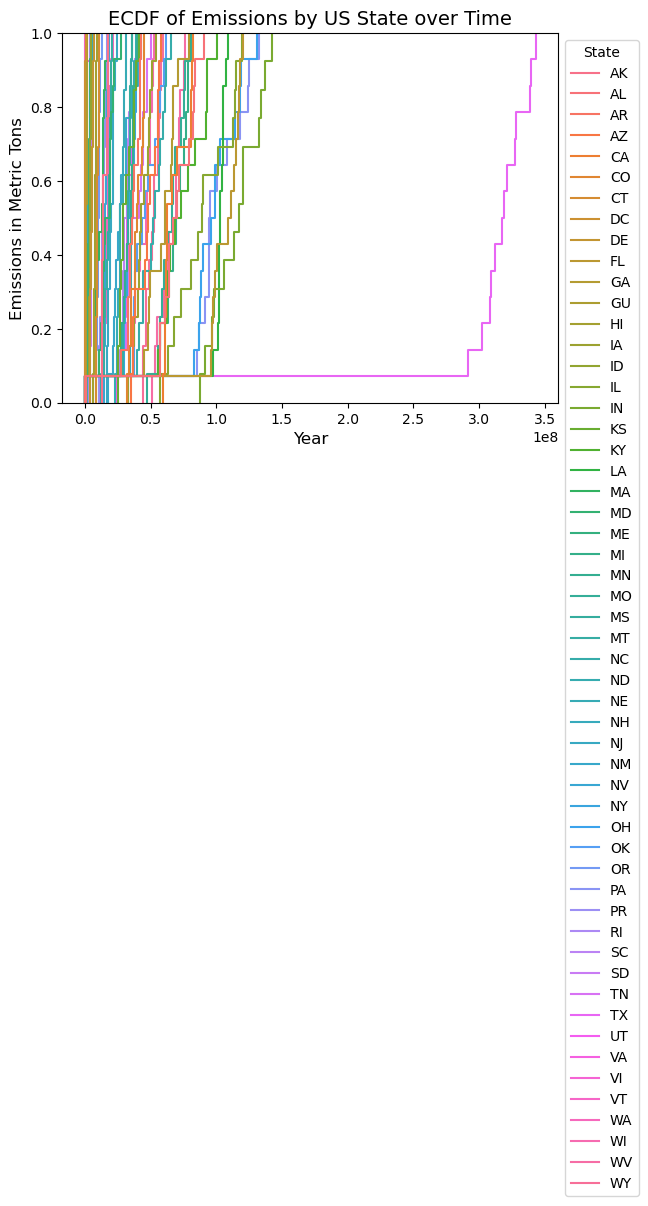

In [9]:
#ecdf of CO2 emissions (no log transformation ) metric tons
ax = sns.ecdfplot(data=group_df, x="Unit CO2 emissions (non-biogenic) ", hue = "State")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("ECDF of Emissions by US State over Time", fontsize=14)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Emissions in Metric Tons", fontsize=12)

Text(0.5, 1.0, 'KDE of Non-Biogenic C02 Emissions')

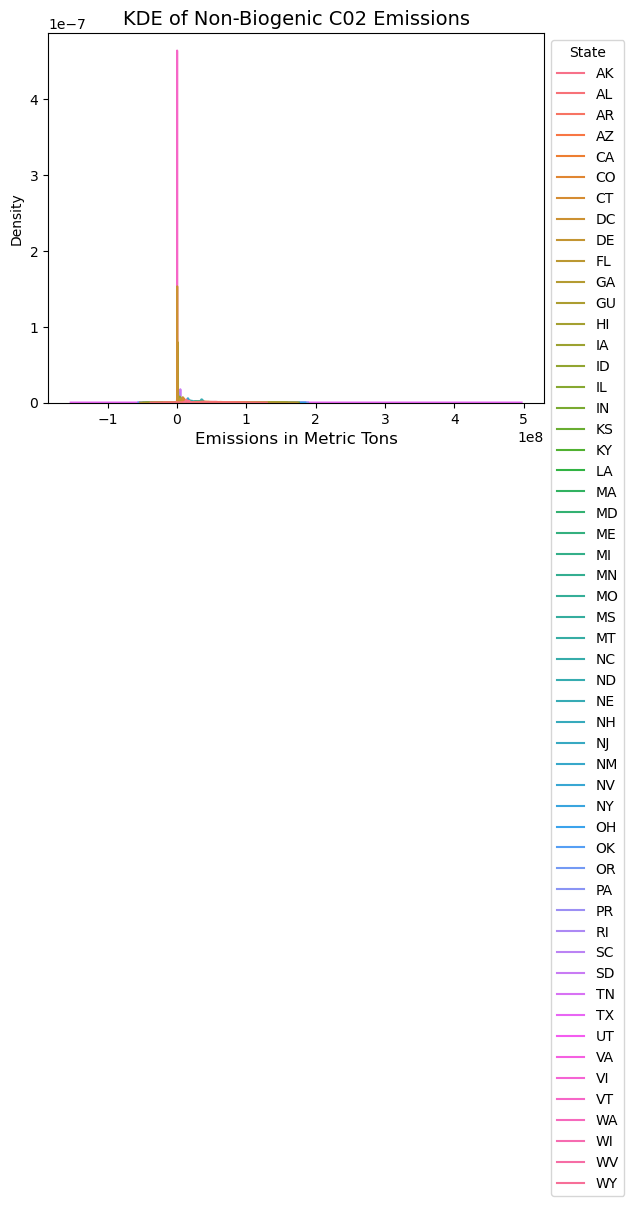

In [10]:
#KDE of CO2 emissions (no log transformation ) metric tons
ax = sns.kdeplot(data=group_df, x="Unit CO2 emissions (non-biogenic) ", hue="State")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Emissions in Metric Tons", fontsize=12)
ax.set_title("KDE of Non-Biogenic C02 Emissions", fontsize=14)

## ECDF and KDE with Log

Text(0, 0.5, 'Proportion')

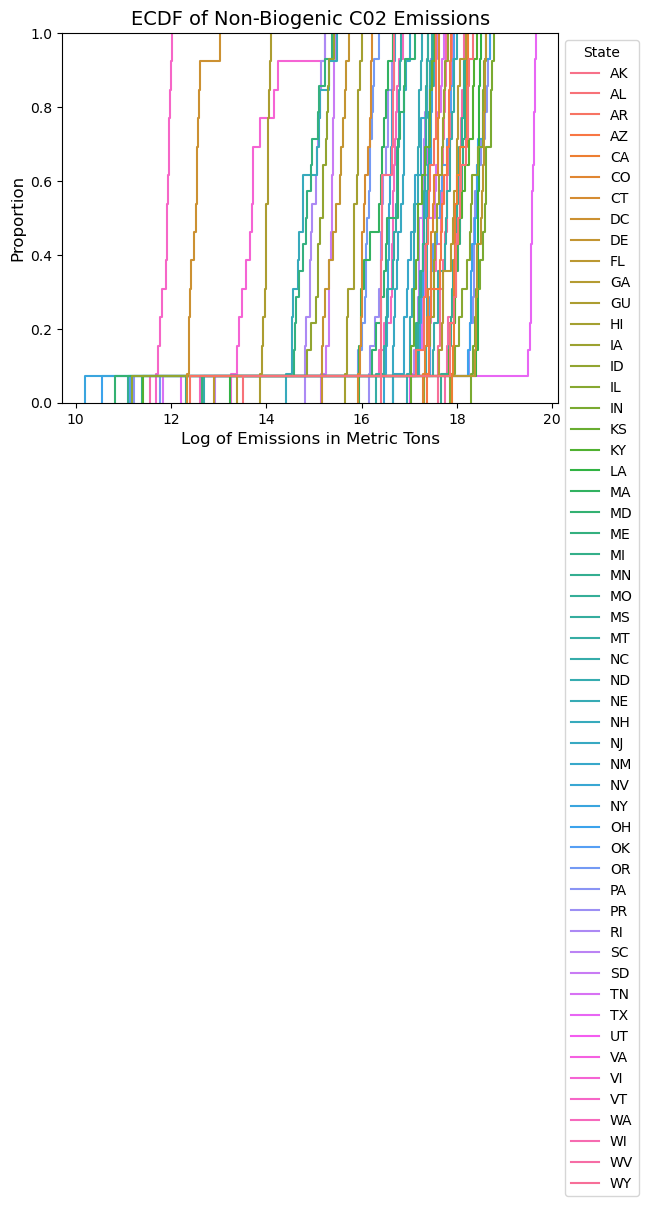

In [11]:
#ecdf of logged CO2 emissions metric tons

ax = sns.ecdfplot(data=group_df, x="UnitE_Log", hue = "State")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("ECDF of Non-Biogenic C02 Emissions", fontsize=14)
ax.set_xlabel("Log of Emissions in Metric Tons", fontsize=12)
ax.set_ylabel("Proportion", fontsize=12)

Text(0.5, 1.0, 'KDE of Non-Biogenic C02 Emissions')

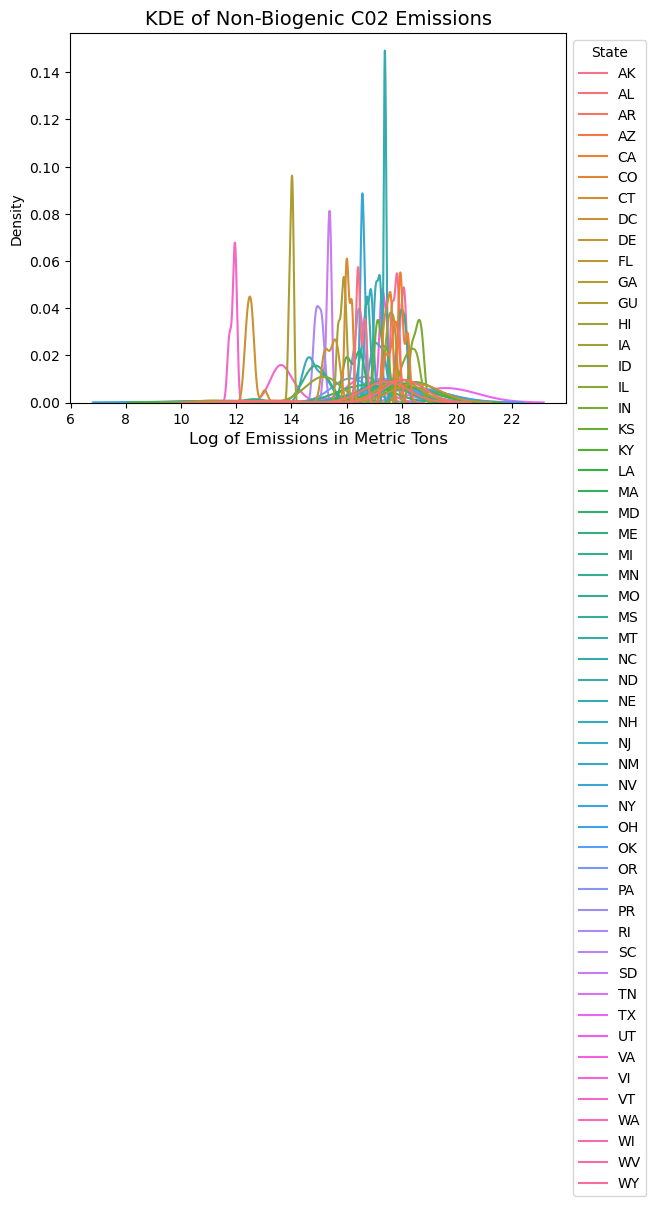

In [12]:
#KDE of logged CO2 emissions metric tons

ax = sns.kdeplot(data=group_df, x="UnitE_Log", hue="State")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel("Log of Emissions in Metric Tons", fontsize=12)
ax.set_title("KDE of Non-Biogenic C02 Emissions", fontsize=14)

## Questions

How are you fitting your model to the phenomenon to get realistic properties of the data?
- We had to aggregate all the cities together to get one row per State and Year
- We picked Non-Biogenic CO2 emissions to focus on because it is the type of emission that is a result of non-renewable carbon sources such as Coal, Oil, Natural gas, and Petroleum products. These are human-caused CO2 emissions rather than natural processes. These carbon dioxide sources are directly addressable by humans and are therefore intriguing from a media and communications perspective. 
 
What challenges did you have to overcome? 
- The emissions were both large and constituted a large range - so taking a log helped standardize the data and make it easier to visualize. The overall quality of the data was good in part due to pre-cleaning the data ahead of visualizations. 

Either use your model to create new sequences (if the model is more generative) or bootstrap a quantity of interest (if the model is more inferential). (15/100 pts)


Critically evaluate your work in part 4. Do your sequences have the properties of the training data, and if not, why not? Are your estimates credible and reliable, or is there substantial uncertainty in your results? (15/100 pts)

In [13]:
def stat(x):
    stat = np.mean(x)
    return stat

In [24]:
def simulate(var, df, fcn, S=1000, plot=True):
    results = []

    for state in df['State'].dropna().unique():
        x = df.loc[df['State'] == state, var]

        estimates = []
        for s in range(S):
            x_s = x.sample(frac=1.0, replace=True)
            estimates.append(fcn(x_s))  

        estimates = np.array(estimates) 

       
        results.extend([{"State": state, "UnitE_Log": val} for val in estimates])

    df_boot = pd.DataFrame(results)

    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- KDE Plot (axes[0]) ---
        # The seaborn call creates the plot and the legend data
        sns.kdeplot(data=df_boot, x="UnitE_Log", hue="State", ax=axes[0])
        axes[0].set_title("KDE of Bootstrapped Estimates")

        # Access the legend object and set its location (e.g., inside top-right)
        legend0 = axes[0].get_legend()
        if legend0:
            legend0.set_bbox_to_anchor((1.0, 1.0))
            legend0.set_loc('upper right')
        
        # --- ECDF Plot (axes[1]) ---
        sns.ecdfplot(data=df_boot, x="UnitE_Log", hue="State", ax=axes[1])
        axes[1].set_title("ECDF of Bootstrapped Estimates")

        # Access the legend object and set its location (e.g., outside top-right)
        legend1 = axes[1].get_legend()
        if legend1:
            legend1.set_bbox_to_anchor((1.05, 1.0)) # Move slightly outside (1.05)
            legend1.set_loc('upper left')
            legend1.set_title('State')

        # Use plt.tight_layout() to prevent the outside legend from being cut off
        plt.tight_layout()

        plt.show()

    return df_boot

/var/folders/v1/c8q_17915_v735dr_k_2fb7w0000gn/T/ipykernel_150/83950370.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


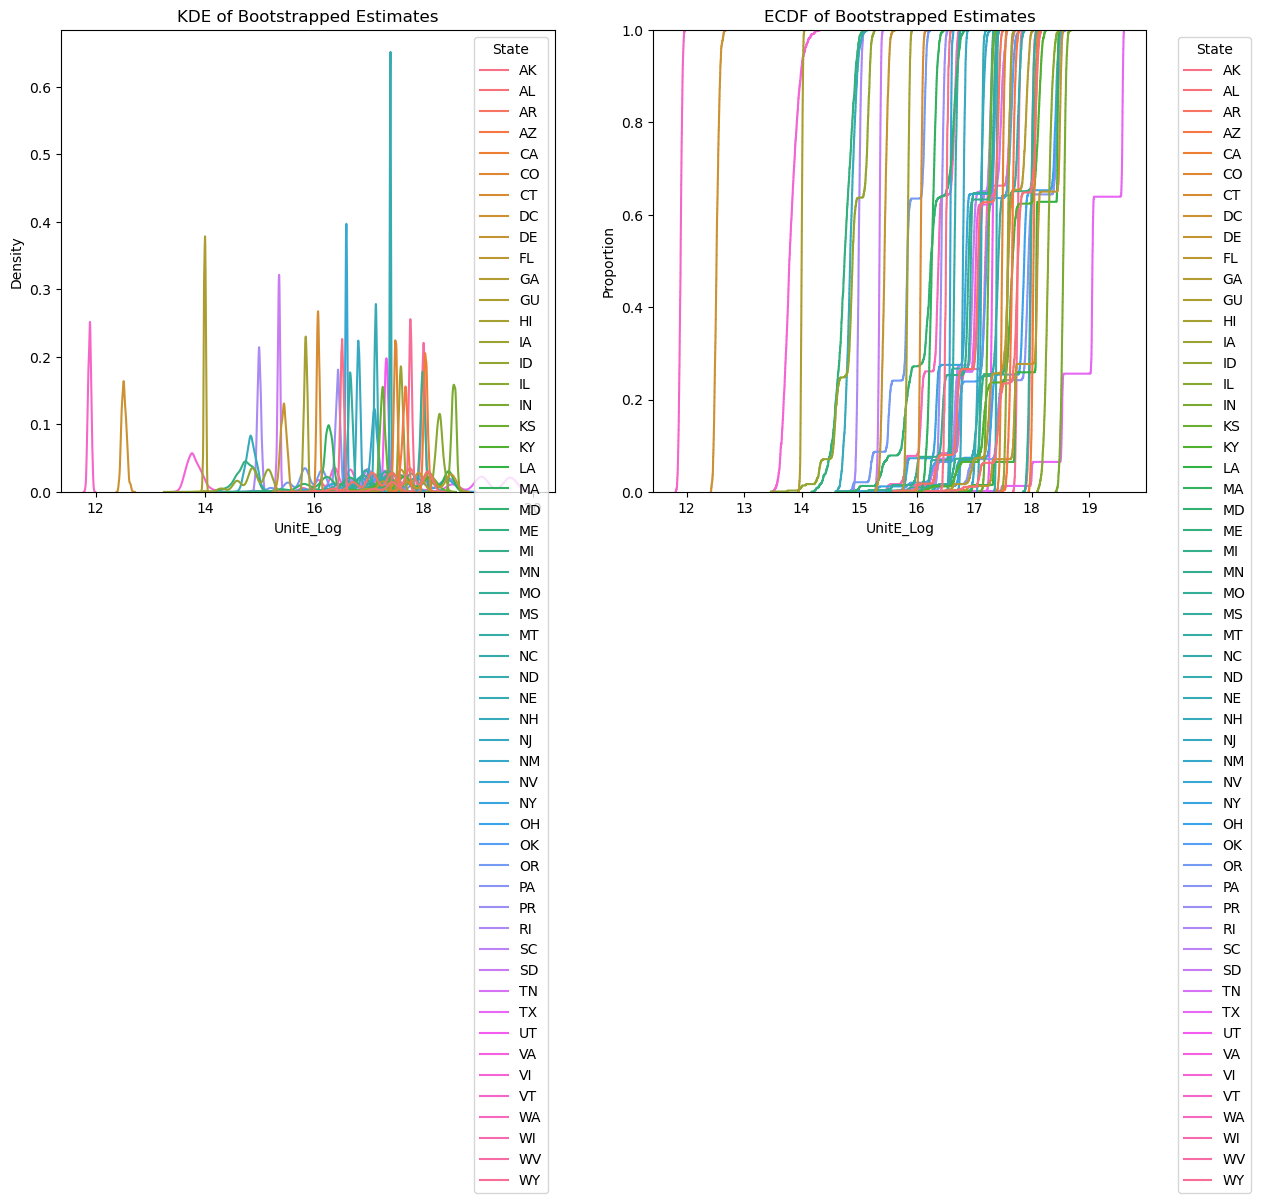

,State,UnitE_Log
0,AK,16.495438
1,AK,16.531467
2,AK,16.529843
3,AK,16.510810
4,AK,16.474275
...,...,...
53995,WY,17.740150
53996,WY,17.761891
53997,WY,17.751877
53998,WY,17.750357


In [25]:
var = 'UnitE_Log'
simulate(var, group_df, stat)